# Personal Information
Name: **Ties Leneman**

StudentID: **15843475**

Email: [**ties.leneman@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **23.03.2025**

# Data Context
**In this section you should introduce the datasources and datasets which you will be working with. Explain where they are from as well as their domain. Give an overview of what the context of the data is. You should not spend more than 1 to 2 paragraphs here as the core information will be in the next section.**

# Data Description

**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

As you can see, you are in a jupyter notebook environment here. This means that you should focus little on writing text and more on actually exploring your data. If you need to, you can use the amsmath environment in-line: $e=mc^2$ or also in separate equations such as here:

\begin{equation}
    e=mc^2 \mathrm{\space where \space} e,m,c\in \mathbb{R}
\end{equation}

Furthermore, you can insert images such as your data aggregation diagrams like this:

![image](example.png)

In [2]:
# Imports
import os
import numpy as np
import pandas as pd
import traceback
import sys
import xarray as xr
import numpy as np
import eccodes


### Data Loading

In [3]:
import cfgrib
import matplotlib.pyplot as plt

grib_file = r"C:/Users/31610/Documents/UvA/Master thesis/Data/edasampledata.grib"
grib_file_OLR = r"C:/Users/31610/Documents/UvA/Master thesis/Data/OLR2012dif.grib"

nc = r"C:/Users/31610/Documents/UvA/Master thesis/Data/data_stream-oper_stepType-instant.nc"
nc1 = r"C:/Users/31610/Documents/UvA/Master thesis/Data/data_stream-oper_stepType-accum.nc"

# Open the GRIB file using cfgrib
ds = xr.open_dataset(nc)
ds_olr = xr.open_dataset(nc1)




In [4]:
# checking the length and size of the data
for key in ds.keys():
    print(f"Variable: {key}")
    print(f"  Shape: {ds[key].shape}")
    print(f"  Size: {ds[key].size}")
    print()

# checking the length and size of the data
for key in ds_olr.keys():
    print(f"Variable: {key}")
    print(f"  Shape: {ds_olr[key].shape}")
    print(f"  Size: {ds_olr[key].size}")
    print()



Variable: u10
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: v10
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: d2m
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: t2m
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: msl
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: sst
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: z
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: tcwv
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: v100
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: u100
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: tp
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: ttr
  Shape: (187, 721, 1440)
  Size: 194150880

Variable: str
  Shape: (187, 721, 1440)
  Size: 194150880



Merging the two datasets.

In [ ]:
print("Dimensions of ds:", ds.dims)
print("Coordinates of ds:", ds.coords)
print("Dimensions of ds_olr:", ds_olr.dims)
print("Coordinates of ds_olr:", ds_olr.coords)


common_dims = set(ds.dims).intersection(set(ds_olr.dims))
print("Common dimensions:", common_dims)
print(type(ds))
print(type(ds_olr))


# Merge the aligned datasets
ds = xr.merge([ds_olr, ds], compat="identical")

# Print the merged dataset to verify
#print(ds.variables)
print(ds.t2m)
print([len(ds[variable].valid_time) for variable in ds.data_vars])
    


Dimensions of ds: FrozenMappingWarningOnValuesAccess({'valid_time': 187, 'latitude': 721, 'longitude': 1440})
Coordinates of ds: Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 1kB 2012-01-01T06:00:00 ... 2012-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 3kB '0001' '0001' '0001' ... '0001' '0001'
Dimensions of ds_olr: FrozenMappingWarningOnValuesAccess({'valid_time': 187, 'latitude': 721, 'longitude': 1440})
Coordinates of ds_olr: Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 1kB 2012-01-01T06:00:00 ... 2012-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 3kB ...
Common dimensions: {'valid_time', 'latitude', 'longitud

# Examples of a few variables visualized

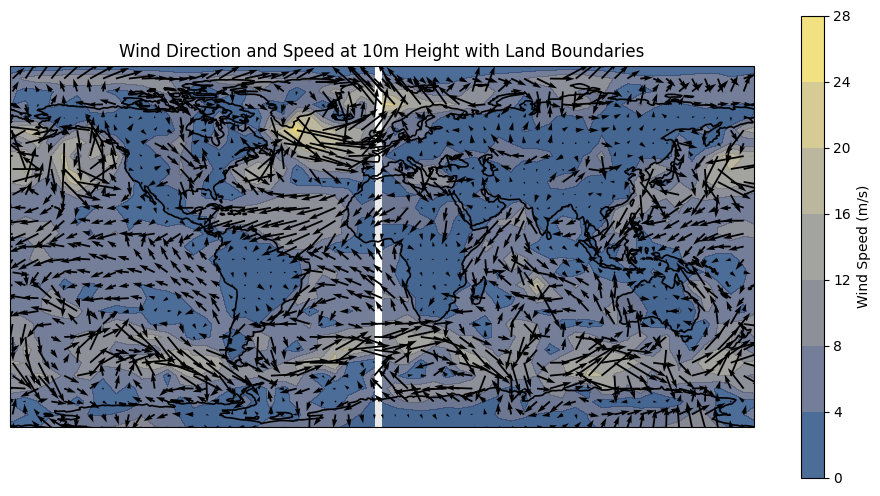

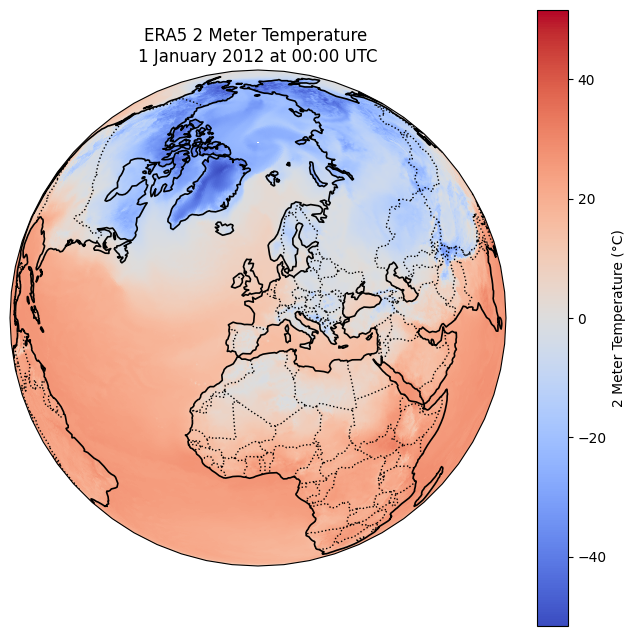

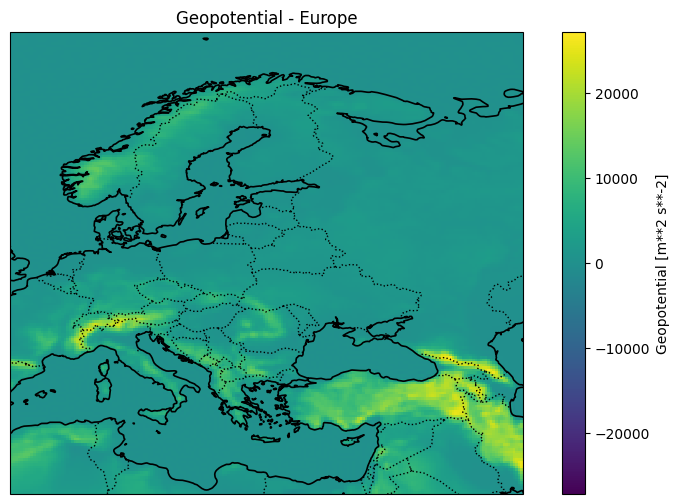

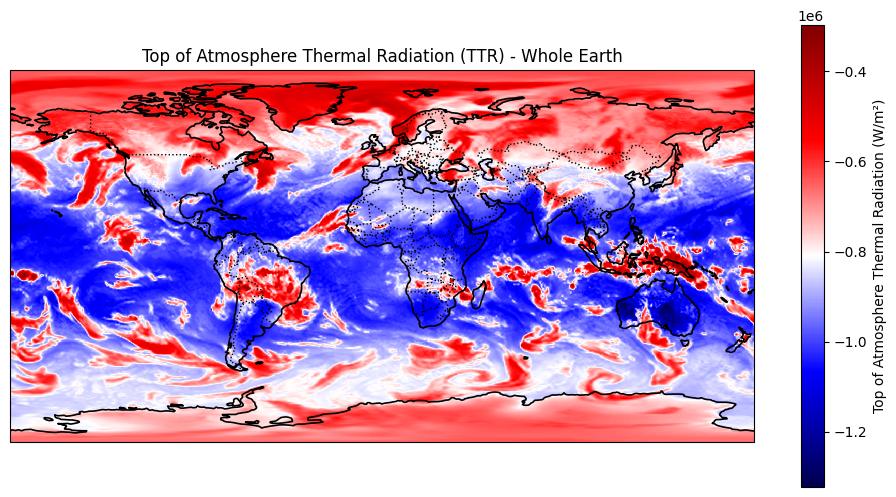

In [10]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Define the latitude and longitude bounds to include the whole of Europe, including Iceland and England
europe_lat_bounds = (75, 30)  # From Iceland in the north to southern Europe
europe_lon_bounds = (-90, 50)  # From Iceland and Portugal in the west to eastern Europe

# Select the 't2m' variable and filter for Europe
t2m_europe = ds['t2m'].sel(
    latitude=slice(europe_lat_bounds[1], europe_lat_bounds[0]),
    longitude=slice(europe_lon_bounds[0], europe_lon_bounds[1])
).isel(valid_time=0)  # Select the first time step for simplicity

# Convert temperature from Kelvin to Celsius
t2m_europe_celsius = t2m_europe - 273.15

# Define skip value for wind vectors
skip = 5
# Select wind data without filtering for Europe
lon = ds['longitude'][::skip]
lat = ds['latitude'][::skip]
u10 = ds['u10'].isel(valid_time=0)[::skip, ::skip]
v10 = ds['v10'].isel(valid_time=0)[::skip, ::skip]

# Apply skipping after selecting the matching latitude and longitude
u10 = u10[::skip, ::skip]
v10 = v10[::skip, ::skip]

# Calculate wind speed
wind_speed = np.sqrt(u10**2 + v10**2)

# Create a plot with Cartopy
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Reduce longitude and latitude to match wind_speed dimensions
reduced_lon = lon[::skip]
reduced_lat = lat[::skip]

# Background color with wind speed
cf = ax.contourf(
    reduced_lon,
    reduced_lat,
    wind_speed,
    cmap='cividis',
    alpha=0.7,
    transform=ccrs.PlateCarree()
)

# Wind vectors (arrows)
ax.quiver(reduced_lon, reduced_lat, u10, v10, scale=300, color='black', transform=ccrs.PlateCarree())

# Add coastlines and land features
ax.add_feature(cfeature.COASTLINE, linewidth=1.2)
ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.5)

# Labels and title
plt.colorbar(cf, label="Wind Speed (m/s)")
ax.set_title("Wind Direction and Speed at 10m Height with Land Boundaries")

plt.show()

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Select the 't2m' and 'msl' variables for a specific date in 2012
t2m = ds['t2m'].sel(valid_time='2012-01-01T06:00:00')  # Replace with the desired date
msl = ds['msl'].sel(valid_time='2012-01-01T06:00:00')  # Replace with the desired date

# Convert temperature from Kelvin to Celsius
t2m_celsius = t2m - 273.15

# Create a figure with an Orthographic projection
fig, ax = plt.subplots(
    figsize=(8, 8),
    subplot_kw={'projection': ccrs.Orthographic(central_longitude=0, central_latitude=45)}
)

# Plot the 2-meter temperature
t2m_celsius.plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='coolwarm',
    cbar_kwargs={'label': '2 Meter Temperature (°C)'}
)



# Add coastlines and other features
ax.add_feature(cfeature.COASTLINE, linewidth=1.2)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.5)

# Set the title
ax.set_title('ERA5 2 Meter Temperature \n1 January 2012 at 00:00 UTC')

# Show the plot
plt.show()

# Select the 'z' variable and filter for Europe
z_europe = ds['z'].sel(
    latitude=slice(europe_lat_bounds[0], europe_lat_bounds[1]),
    longitude=slice(europe_lon_bounds[0], europe_lon_bounds[1])
).isel(valid_time=0)  # Select the first time step for simplicity

# Create a plot with Cartopy for the 'z' variable
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the 'z' variable for Europe as geopotential height
z_europe.plot(ax=ax, cmap='viridis', transform=ccrs.PlateCarree())

# Add coastlines and other features
ax.add_feature(cfeature.COASTLINE, linewidth=1.2)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.5)

# Set labels and title
ax.set_title('Geopotential - Europe')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


# Plot the 'ttr' variable for the whole Earth
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the 'ttr' variable
ds['ttr'].isel(valid_time=0).plot(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='seismic',
    cbar_kwargs={'label': 'Top of Atmosphere Thermal Radiation (W/m²)'}
)

# Add coastlines and other features
ax.add_feature(cfeature.COASTLINE, linewidth=1.2)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, color='lightgray', alpha=0.5)

# Set the title
ax.set_title('Top of Atmosphere Thermal Radiation (TTR) - Whole Earth')

# Show the plot
plt.show()



### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

### Analysis 2: 

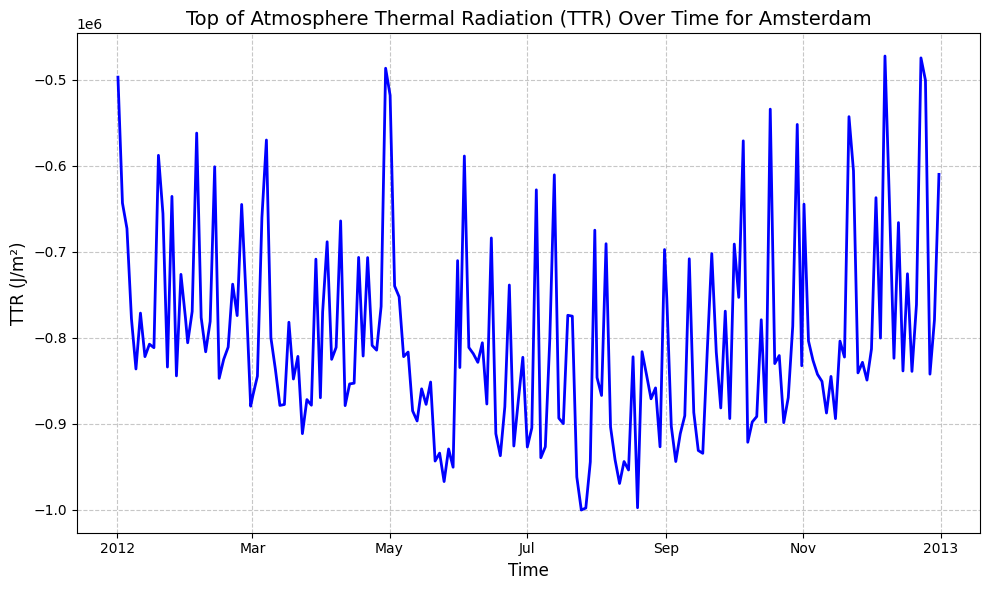

In [12]:
# Select the nearest point for Amsterdam and convert temperature from Kelvin to Celsius
amsterdam_ttr = ds['ttr'].isel(valid_time=180).sel(latitude=52.25, longitude=4.75, method='nearest')

# Extract temperature at Amsterdam for time=0
amsterdam_ttr_time = ds['ttr'].sel(latitude=52.25, longitude=4.75, method='nearest')

plot = amsterdam_ttr_time.plot(figsize=(10, 6), color='blue', linewidth=2)
plt.title("Top of Atmosphere Thermal Radiation (TTR) Over Time for Amsterdam", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("TTR (J/m²)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()



### Analysis n:

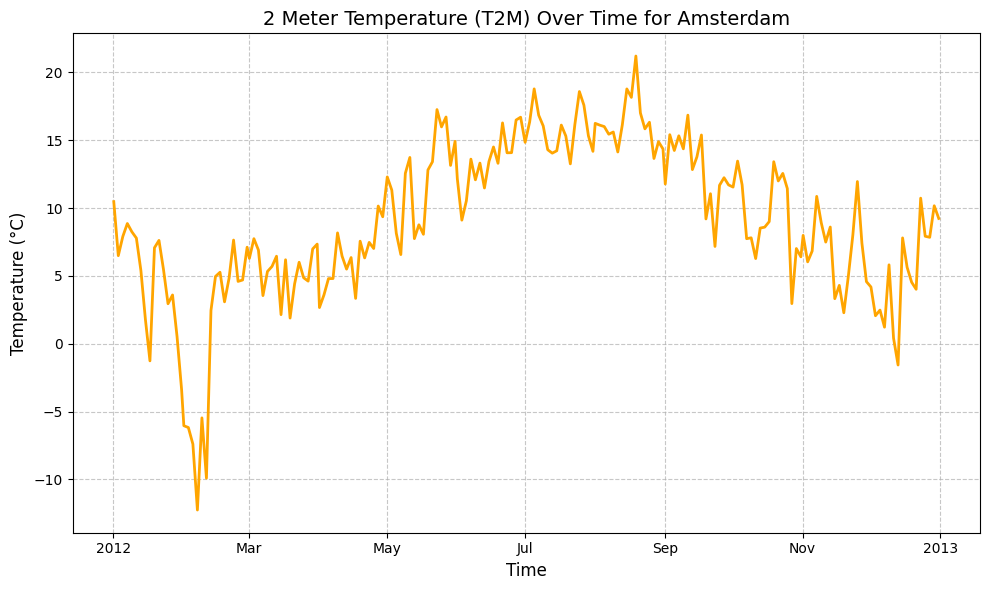

In [13]:

# Select the nearest point for Amsterdam and convert temperature from Kelvin to Celsius
amsterdam_ttr = ds['ttr'].isel(valid_time=180).sel(latitude=52.25, longitude=4.75, method='nearest')

# Extract temperature at Amsterdam for time=0
# Extract temperature at Amsterdam for all valid times and convert from Kelvin to Celsius
amsterdam_t2m_time = ds['t2m'].sel(latitude=52.25, longitude=4.75, method='nearest') - 273.15

# Plot the 2-meter temperature over time for Amsterdam
plot = amsterdam_t2m_time.plot(figsize=(10, 6), color='orange', linewidth=2)
plt.title("2 Meter Temperature (T2M) Over Time for Amsterdam", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



As 

In [30]:
# Select the nearest point to Amsterdam (52.25°N, 4.75°E)
amsterdam_data = ds.sel(latitude=52.25, longitude=4.75, method='nearest')

# Extract time
time_values = amsterdam_data['valid_time'].values

# Create a dictionary to store the data
data_dict = {'time': time_values}

# Loop through all data variables and add them to the dictionary with conversions
for var_name in ds.data_vars:
    var_values = amsterdam_data[var_name].values
    if var_name == 't2m':
        # Replace t2m with Temperature_C
        data_dict['t2m'] = var_values - 273.15  # Convert to °C
    elif var_name == 'd2m':
        # Replace d2m with Dewpoint_C
        data_dict['d2m'] = var_values - 273.15  # Convert to °C
    elif var_name == 'sst':
        # Replace sst with SST_C
        data_dict['sst'] = var_values - 273.15  # Convert to °C
    elif var_name == 'z':
        # Replace z with Geopotential_Height
        g = 9.81  # Acceleration due to gravity (m/s²)
        data_dict['z'] = var_values / g  # Convert to meters
    elif var_name == 'msl':
        # Replace msl with MSL_hPa
        data_dict['msl'] = var_values / 100  # Convert Pa to hPa
    elif var_name == 'ttr':
        # Convert ttr to olr by taking the negative
        data_dict['olr'] = -var_values  # olr = -ttr
    else:
        # Keep other variables as they are
        data_dict[var_name] = var_values

# Create the DataFrame
df_amsterdam = pd.DataFrame(data_dict)

# Add wind speed variables
df_amsterdam['Wind_Speed_10m'] = np.sqrt(df_amsterdam['u10']**2 + df_amsterdam['v10']**2)
df_amsterdam['Wind_Speed_100m'] = np.sqrt(df_amsterdam['u100']**2 + df_amsterdam['v100']**2)

# Save the updated DataFrame
df_amsterdam.to_csv("amsterdam_all_variables_2012.csv", index=False)
print("Updated DataFrame saved to amsterdam_all_variables_2012.csv")
print("Columns in DataFrame:", df_amsterdam.columns.tolist())
print("DataFrame (first 5 rows):\n", df_amsterdam.head())
print("Summary statistics:\n", df_amsterdam.describe())

Updated DataFrame saved to amsterdam_all_variables_2012.csv
Columns in DataFrame: ['time', 'tp', 'olr', 'str', 'u10', 'v10', 'd2m', 't2m', 'msl', 'sst', 'z', 'tcwv', 'v100', 'u100', 'Wind_Speed_10m', 'Wind_Speed_100m']
DataFrame (first 5 rows):
                  time        tp       olr         str        u10        v10  \
0 2012-01-01 06:00:00  0.000083  496685.0   14606.000   6.536194   4.220779   
1 2012-01-03 06:00:00  0.000196  643128.0 -105650.000   3.537140  10.831161   
2 2012-01-05 06:00:00  0.000514  672699.0 -113972.375  12.918930  -2.364029   
3 2012-01-07 06:00:00  0.000170  777628.0  -57075.500   9.518387  -1.381805   
4 2012-01-09 06:00:00  0.000021  836094.0  -11405.875   5.230820  -0.196701   

        d2m        t2m          msl  sst         z       tcwv       v100  \
0  9.895966  10.476898  1007.466248  NaN -1.467482  21.916029   6.079041   
1  3.812897   6.492523  1007.237488  NaN -1.467482  17.252134  15.779587   
2  5.149445   7.907867   989.346863  NaN -1.467482 

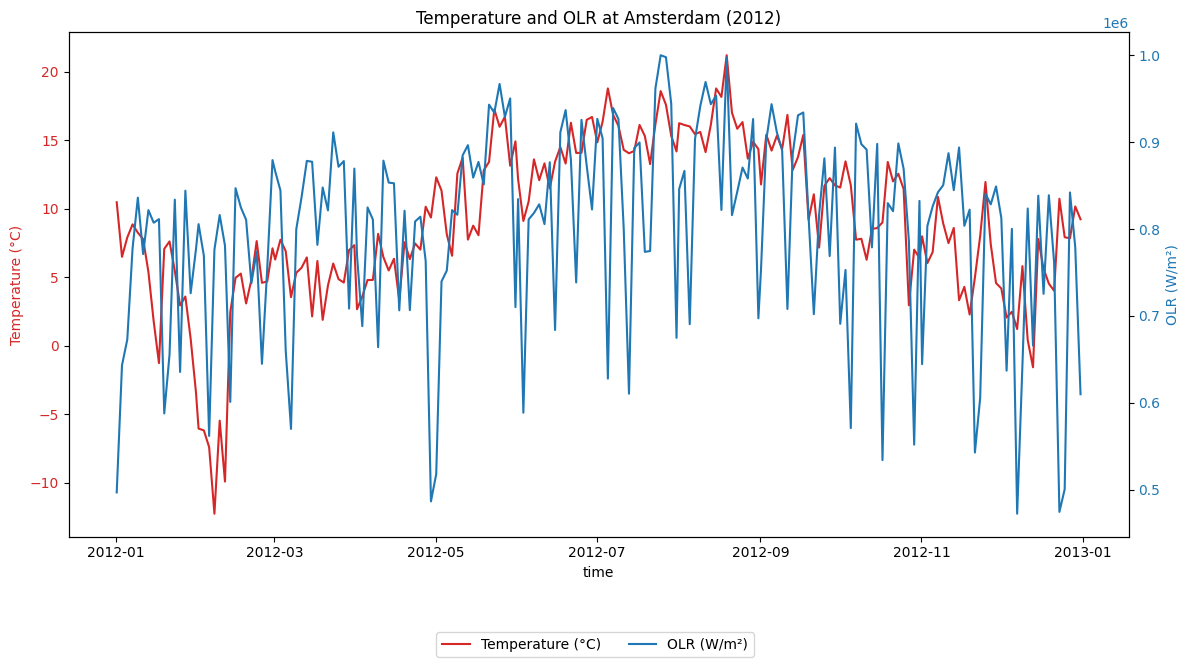

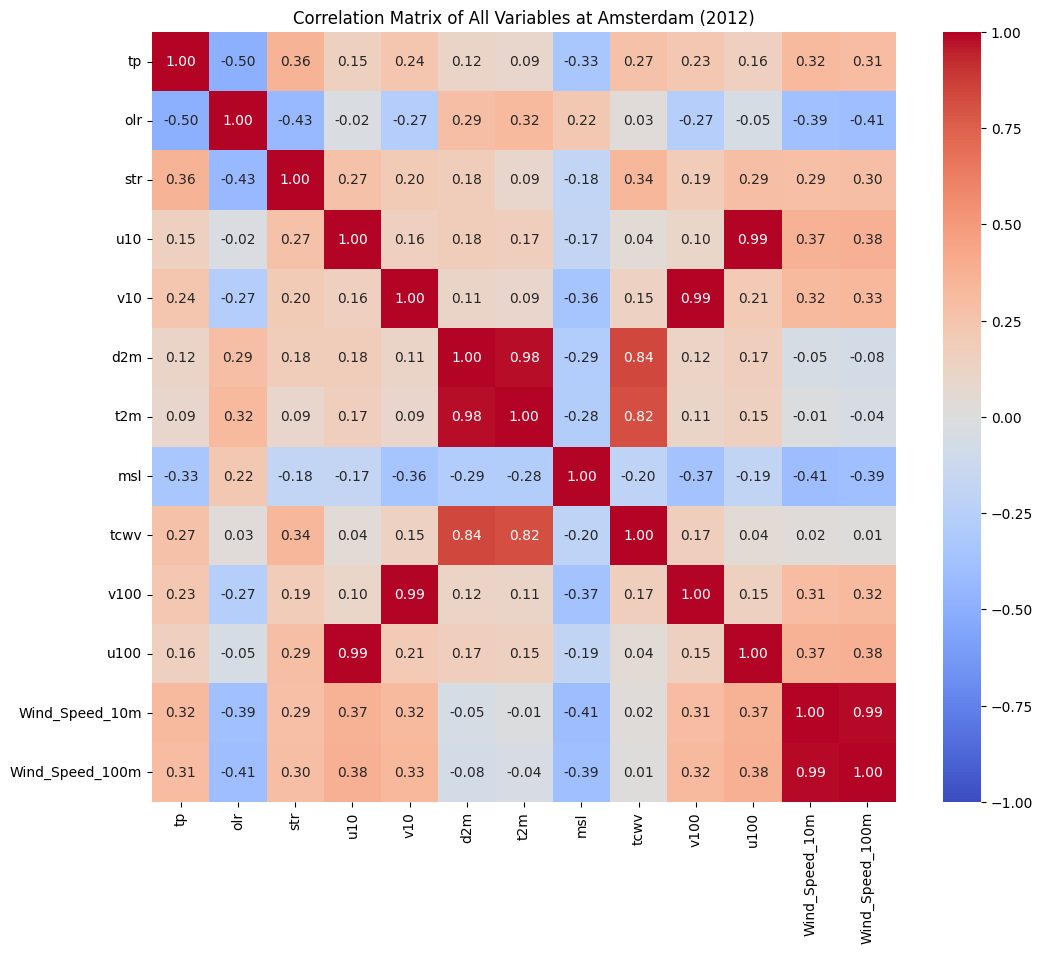

In [ ]:
# Plot Temperature and OLR (dual-axis)
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(df_amsterdam['time'], df_amsterdam['t2m'], color='tab:red', label='Temperature (°C)')
ax1.set_xlabel('time')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.plot(df_amsterdam['time'], df_amsterdam['olr'], color='tab:blue', label='OLR (W/m²)')
ax2.set_ylabel('OLR (W/m²)', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Temperature and OLR at Amsterdam (2012)')
fig.tight_layout()
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.show()


import seaborn as sns

# Identify numerical columns (excluding time, sst, and z. As these variables are non numerical or not relevant)
numerical_cols = [col for col in df_amsterdam.columns if col not in ['time', 'sst', 'z']]

# Compute the correlation matrix
correlation_matrix = df_amsterdam[numerical_cols].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('Correlation Matrix of All Variables at Amsterdam (2012)')
plt.show()
